Попробуйте добиться качества 0.992  на данном датасете (в максимуме на валидации). Обратите внимание на следующие моменты:

    Появляется ли у вас переобучение при увеличении количества эпох?
    Как добавление различных слоев влияет на скорость обучения (какие слои быстрее: сверточные или полносвязные)?

Помните, что результат обучения может меняться в от запуска к запуску. Проанализируйте дисперсию целевой метрики от запуска к запуску. Сколько запусков достаточно произвести, перед тем как утверждать, что одна архитектура лучше другой?

In [61]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [62]:
import torchvision.datasets

In [63]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


In [64]:
X_train = MNIST_train.data
y_train = MNIST_train.targets
X_test = MNIST_test.data
y_test = MNIST_test.targets

In [65]:
len(y_train), len(y_test)

(60000, 10000)

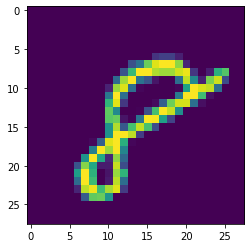

tensor(5)


In [66]:
import matplotlib.pyplot as plt
plt.imshow(X_train[59999, :, :])
plt.show()
print(y_train[0])

In [67]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [68]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [69]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5*5*16, 84)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(84, 10)
        self.act4  = torch.nn.Tanh()


    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        
        return x
    
lenet5 = LeNet5()

In [70]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [71]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [72]:
batch_size = 630
train_accuracy_history = []
test_accuracy_history = []
test_loss_history = []
train_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    train_loss_history.append(loss(preds, y_batch).data.cpu())
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (preds.argmax(dim=1) == y_batch).float().mean().data.cpu()
    train_accuracy_history.append(accuracy)
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

tensor(0.9330)
tensor(0.9625)
tensor(0.9733)
tensor(0.9778)
tensor(0.9805)
tensor(0.9822)
tensor(0.9832)
tensor(0.9832)
tensor(0.9853)
tensor(0.9860)
tensor(0.9865)
tensor(0.9874)
tensor(0.9877)
tensor(0.9874)
tensor(0.9877)
tensor(0.9883)
tensor(0.9884)
tensor(0.9896)
tensor(0.9888)
tensor(0.9894)
tensor(0.9900)
tensor(0.9891)
tensor(0.9897)
tensor(0.9903)
tensor(0.9903)
tensor(0.9904)
tensor(0.9890)
tensor(0.9902)
tensor(0.9904)
tensor(0.9900)
tensor(0.9901)
tensor(0.9908)
tensor(0.9903)
tensor(0.9905)
tensor(0.9902)
tensor(0.9901)
tensor(0.9908)
tensor(0.9915)
tensor(0.9913)
tensor(0.9910)
tensor(0.9910)
tensor(0.9919)
tensor(0.9918)
tensor(0.9910)
tensor(0.9912)
tensor(0.9916)
tensor(0.9904)
tensor(0.9905)
tensor(0.9916)
tensor(0.9911)
tensor(0.9913)
tensor(0.9906)
tensor(0.9909)
tensor(0.9918)
tensor(0.9908)
tensor(0.9909)
tensor(0.9910)
tensor(0.9907)
tensor(0.9910)
tensor(0.9916)
tensor(0.9913)
tensor(0.9916)
tensor(0.9915)
tensor(0.9911)
tensor(0.9915)
tensor(0.9913)
tensor(0.9

KeyboardInterrupt: ignored

In [ ]:
lenet5.forward(X_test)

In [ ]:
plt.plot(train_accuracy_history);
plt.plot(test_accuracy_history);


In [ ]:
plt.plot(train_loss_history);
plt.plot(test_loss_history);

Максимальный результат после более чем 100 эпох обучения составил 0.9931. Чтобы добиться такого результата я убрал третий полносвязный слой, оставив только два:

self.fc1   = torch.nn.Linear(5*5*16, 84)

self.fc2   = torch.nn.Linear(84, 10)

Также я увеличил размер батча до 630. Построил графики loss-а и accuracy на трейне и на тесте, переобучения на тесте не происходит.

При увеличении количество эпох с 10 000 до 100 000 переобучения не происходит.

При добавлении полносвязного слоя, скорость обучения уменьшается и максимальное значение результата также уменьшается. После удаления полносвязного слоя сеть начала обучаться быстрее и значение accuracy стало превышать 0.992.

В среднем на утверждение новой модели необходимо было провести от 2 до 4 запусков с анализом около 100 эпох обучения.

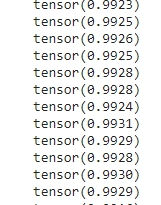

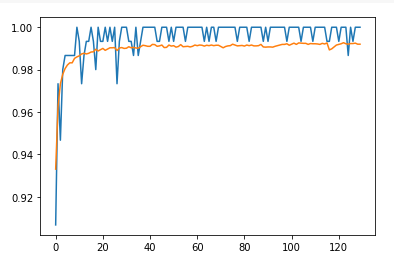

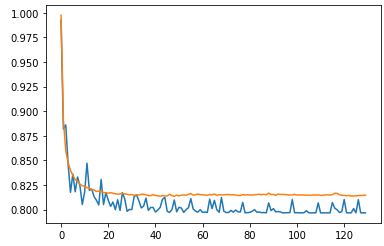